# Trabajo practico 2024 de Minería de Datos - TUIA

# Integrantes
- Brisa Moresco
- Julián F. Britos

# Librerías

In [1]:
!pip install plotly
!pip install umap-learn
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install gap-stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=a5b635520a5e90077fc5660e687f902b88944f2d10bdad217811630ca85ddbc5
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from umap import UMAP
import plotly.express as px
from gap_statistic import OptimalK
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D


# Carga de datos

In [3]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Análisis de datos

In [4]:
# Analizamos los valores de los atributos
valores = df.head()
print(valores)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [5]:
# Analizamos la distribución de los atributos
distribucion = df.describe()
print(distribucion)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [6]:
# Analizamos los tipos de datos
tipos = df.dtypes
print(tipos)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [7]:
# Comprobar si hay valores nulos en todo el DataFrame
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Normalización y Estandarización

Utilizamos la normalización únicamente para poder graficar los boxplot de manera correcta y así visualizar los outliers.

In [8]:
# Normalización
# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the dataframe and transform the dataframe
df_normalized = pd.DataFrame(scaler.fit_transform(df.drop(columns=["label"])), columns=df.drop(columns=["label"]).columns)

# Create a new DataFrame where each row is a variable and each column is an observation
df_melted = df_normalized.melt()


In [9]:
# Estandarización
df_sub = df.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()

# Outliers

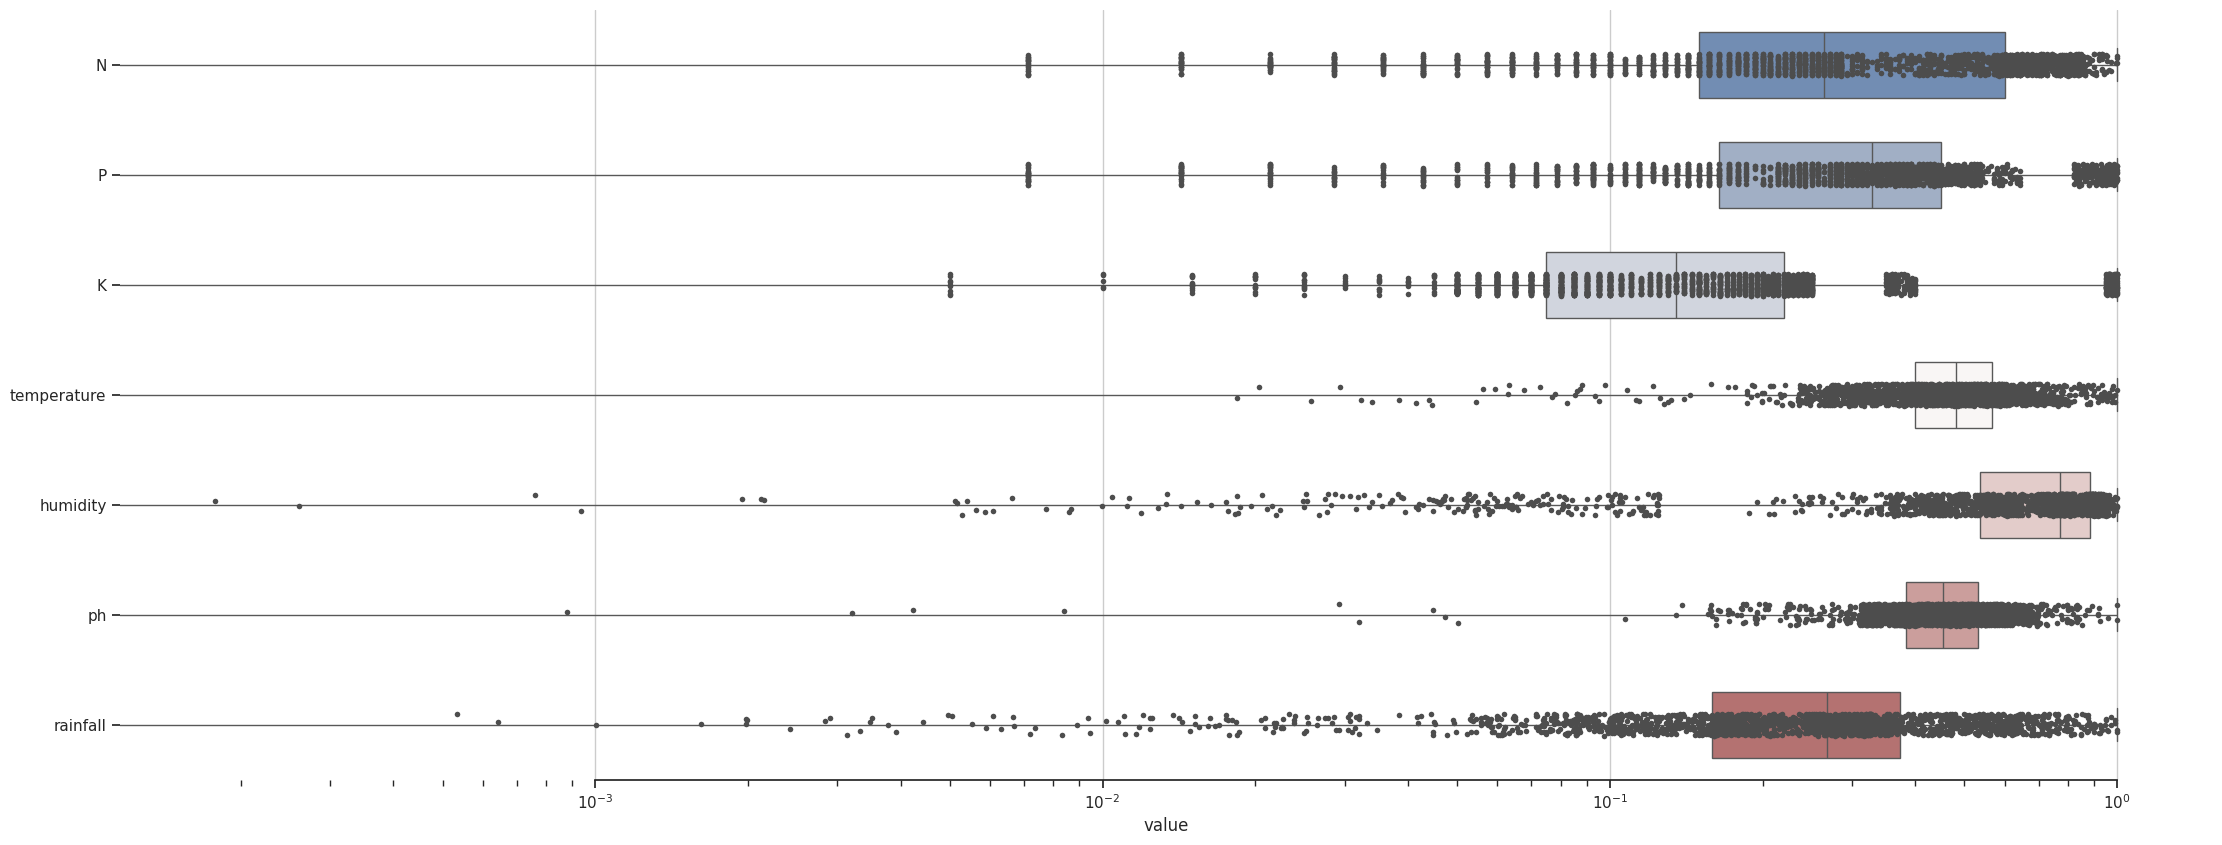

In [10]:
sns.set_theme(style="ticks")

# Inicializa la figura con un eje x logarítmico
f, ax = plt.subplots(figsize=(27, 10))
ax.set_xscale("log")

# Traza el periodo orbital con cajas horizontales
sns.boxplot(
    df_melted, x="value", y="variable", hue="variable",
    whis=[0, 100], width=.6, palette="vlag"
)

# Añade puntos para mostrar cada observación
sns.stripplot(df_melted, x="value", y="variable", size=4, color=".3")

# Ajusta la presentación visual
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

No vemos que el set de datos tengo outliers significativos, así que decidimos no eliminar ningún tipo de dato

# Matriz de correlación

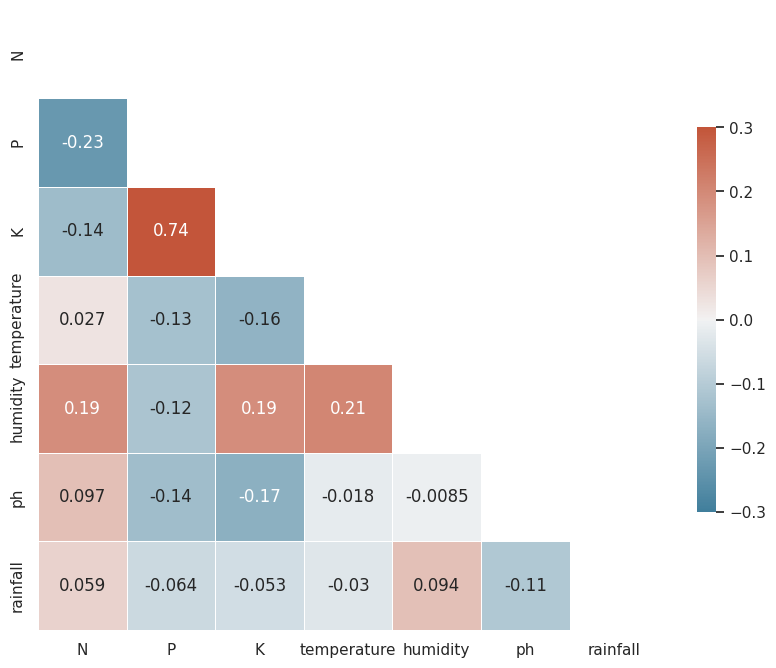

In [11]:
sns.set_theme(style="white")

# Calcular la matriz de correlación

corr = df_normalized.corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))


# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Generar un mapa de colores divergentes personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la proporción de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.3 ,vmax=.3,center=0, square=True,annot=True ,linewidths=.5, cbar_kws={"shrink": .5})

plt.show()



Ya que "K" y "P" están fuertemente correlacionados, visualizamos los datos con “K” en el eje x y “P” en el eje y en un gráfico de dispersión para poder observar cómo cambia “P” en función de “K”, para ver de una manera más grafica su correlación.

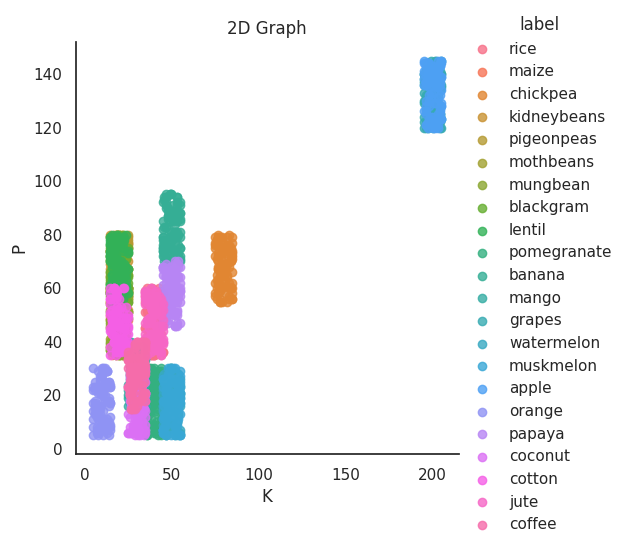

In [12]:
sns.lmplot(x='K', y='P', data=df,
 hue='label', fit_reg=False, legend=True)
plt.title('2D Graph')
plt.show()

# Análisis de componentes principales (PCA)

PCA se encarga de encontrar los componentes principales de un conjunto de datos. Estos componentes principales van a ser las direcciones en las cuales la varianza de los elementos es maxima, o sea, las direcciones en donde los elementos estan mas separados los unos de los otros.
Los comp ppales son todos ortogonales entre si.

* PCA tiene como max n-1 componentes principales que son ortogonales entre si
* cada componente principal es combinacion lineal de todas las variables que dan origen al dataset
* el objetivo es maximizar la varianza


In [13]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1])

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']

In [14]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


Criterios de selección:

- Proporción de variancia acumulada (~75% -80%)​
- Criterio de Kaiser (eigenvalues > 1)​
- Gráfico del codo (Scree)

## Graficamos la varianza acumulada.

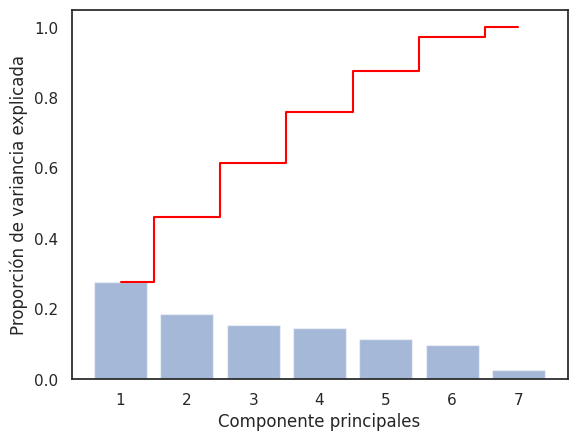

In [15]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Como podemos observar, los eigenvalores > 1 son los componentes 1 a 4 es decir, los componentes que acumulan el 75% , alcanzan a los componentes 1 a 4


## Determinación del número de componentes principales.

### Eigenvectors

Son los valores que conforman los coeficientes de cada una de las nuevas variables.

In [16]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Selección del número de componentes principales

In [17]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [18]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


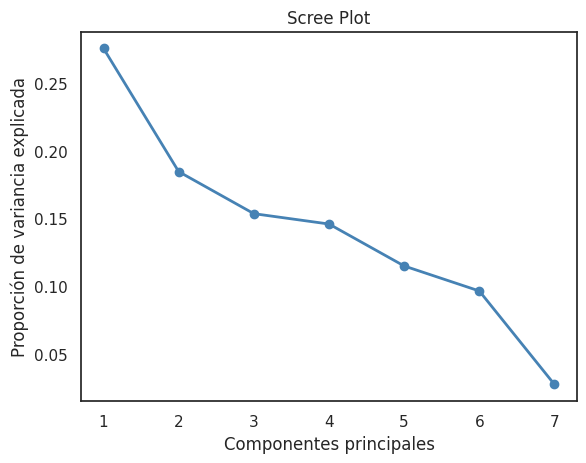

In [19]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

### Conclusión

Las cuatro primeras componentes acumulan el 80% de la variabilidad total, es decir, están cercanas a cumplir con el primer criterio (>~75%). Además, son las únicas cuyos eigenvalues son superiores a 1 (Criterio de Kaiser). No tenemos en cuenta el gráfico de codo, ya que en ningún momento este se logra estabilizar (Scree).

## Graficamos las componentes de PCA en un gráfico 2D.

In [20]:
df.drop(columns=['label']).columns.to_list()
features = df.drop(columns=['label']).columns.to_list()
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'} )
fig.update_layout(title = "Biplot",width = 1200,height = 600)

# Isomap

Isomap busca reducir la dimension, manteniendo las distacias geodesicas.
Comienza estimando las distancias entre los puntos utilizando las distancias más cercanas en el grafo (basandose en las distancia euclideanas), y guarda en un grafo ponderado los pesos que son las distancia geodesicas. Y por ultimo lo recorre para calcular el camino minimo.


**Distancia geodésica:** distancia de mínima longitud que une dos puntos en una superficie dada

In [21]:
df_std

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


In [22]:
# Seleccionar todas las columnas excepto 'label' como características (variables independientes)
x = df.drop(['label'], axis=1)

# Seleccionar la columna 'label' como la variable objetivo (variable dependiente)
y = df['label']


In [23]:
# Crear una instancia del objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformar las características
xScaled = scaler.fit_transform(x)

In [24]:
# Crear una instancia de Isomap con 6 vecinos y 2 componentes principales
isomapWheat = Isomap(n_neighbors=6, n_components=2)

# Ajustar Isomap a las características estandarizadas
isomapWheat.fit(xScaled)

# Transformar las características estandarizadas a las dos dimensiones reducidas
manifold_2Da = isomapWheat.transform(xScaled)

# Crear un DataFrame para almacenar las dimensiones reducidas con nombres de columnas
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Comp1', 'Comp2'])

# Agregar la columna 'category' al DataFrame, que contiene las etiquetas originales
manifold_2D['category'] = y.to_numpy()

# Mostrar las primeras filas del DataFrame
manifold_2D.head()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

,Comp1,Comp2,category
0,4.144556,1.327438,rice
1,4.272144,0.754142,rice
2,5.086342,0.383533,rice
3,4.725210,0.412735,rice
4,5.075260,0.370068,rice


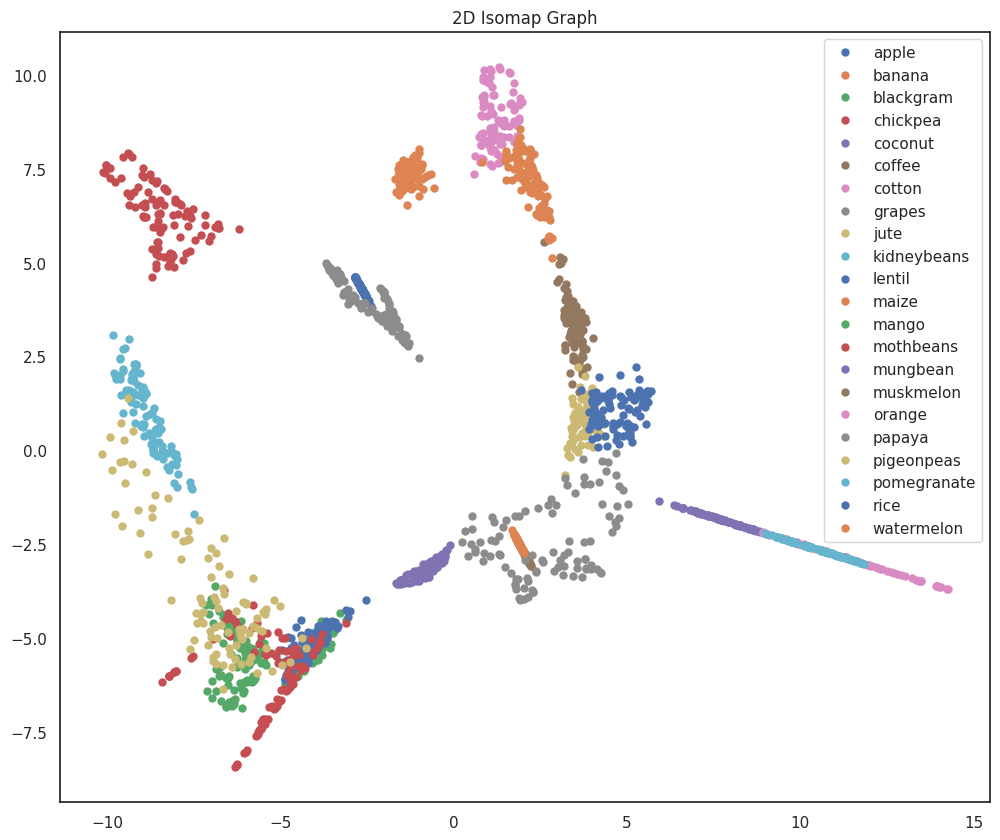

In [25]:
# Agrupar los datos por categoría
groups = manifold_2D.groupby('category')

# Crear una figura para el gráfico
plt.figure(figsize=(12, 10))
plt.title('2D Isomap Graph')

# Iterar sobre cada grupo y trazar los puntos en el gráfico
for name, group in groups:
    plt.plot(group['Comp1'], group['Comp2'], marker='o', linestyle='', markersize=5, label=name)

# Mostrar la leyenda en la esquina superior derecha
plt.legend(loc='upper right')


## Componentes = 2
## Numero de vecinos = 6

In [26]:
isomap_df = Isomap(n_neighbors=6, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

## Componentes = 2
## Numero de vecinos = 25

In [27]:
isomap_df = Isomap(n_neighbors=25, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



## Componentes = 2
## Numero de vecinos = 45

In [28]:
isomap_df = Isomap(n_neighbors=45, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



## Componentes = 3
## Numero de vecinos = 6

In [29]:
isomap_df = Isomap(n_neighbors=6, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

## Componentes = 3
## Numero de vecinos = 8

In [30]:
isomap_df = Isomap(n_neighbors=8, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more effi

## Componentes = 3
## Numero de vecinos = 15

In [31]:
isomap_df = Isomap(n_neighbors=15, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



## Componentes = 3
## Numero de vecinos = 45

In [32]:
isomap_df = Isomap(n_neighbors=45, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



# t-SNE (t-distributed Stochastic Neighbor Embedding)

Es una técnica no lineal no supervisada utilizada principalmente para la exploración de datos y la
visualización de datos de alta dimensión
T-sne sirve para la explotacion de datos y la visualizacion de los datos en alta dimension.

Este algoritmo calcula la medida de similitud entre pares de instancias en el espacio de alta dimension y en el espacio de baja dimension, y luego trata de optimizar estas dos medidas de similitud.

t-SNE es especialmente adecuado
para captar relaciones y patrones complejos en los datos. Para ello, utiliza una distribución de probabilidad para
calcular la similitud entre los puntos de datos en las dimensiones originales y en el espacio de baja dimensión

In [33]:
import time
# Iniciar temporizador
time_start = time.time()

# Crear una instancia de TSNE con 2 componentes, verbose=1 (imprimir progreso), perplexity=40 y n_iter=300
tsneWheat = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

# Aplicar t-SNE a las características estandarizadas
tsneWheatResults = tsneWheat.fit_transform(xScaled)

# Imprimir el tiempo transcurrido
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2200 samples in 0.008s...
[t-SNE] Computed neighbors for 2200 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2200
[t-SNE] Computed conditional probabilities for sample 2000 / 2200
[t-SNE] Computed conditional probabilities for sample 2200 / 2200
[t-SNE] Mean sigma: 0.517370
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.040871
[t-SNE] KL divergence after 300 iterations: 1.132339
t-SNE done! Time elapsed: 5.608182191848755 seconds


In [34]:
# Obtener la forma (número de filas y número de columnas) de la matriz de resultados de t-SNE
tsneWheatResults.shape


(2200, 2)

In [35]:
# Contar el número de ocurrencias de cada categoría en la variable objetivo 'y'
y.value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

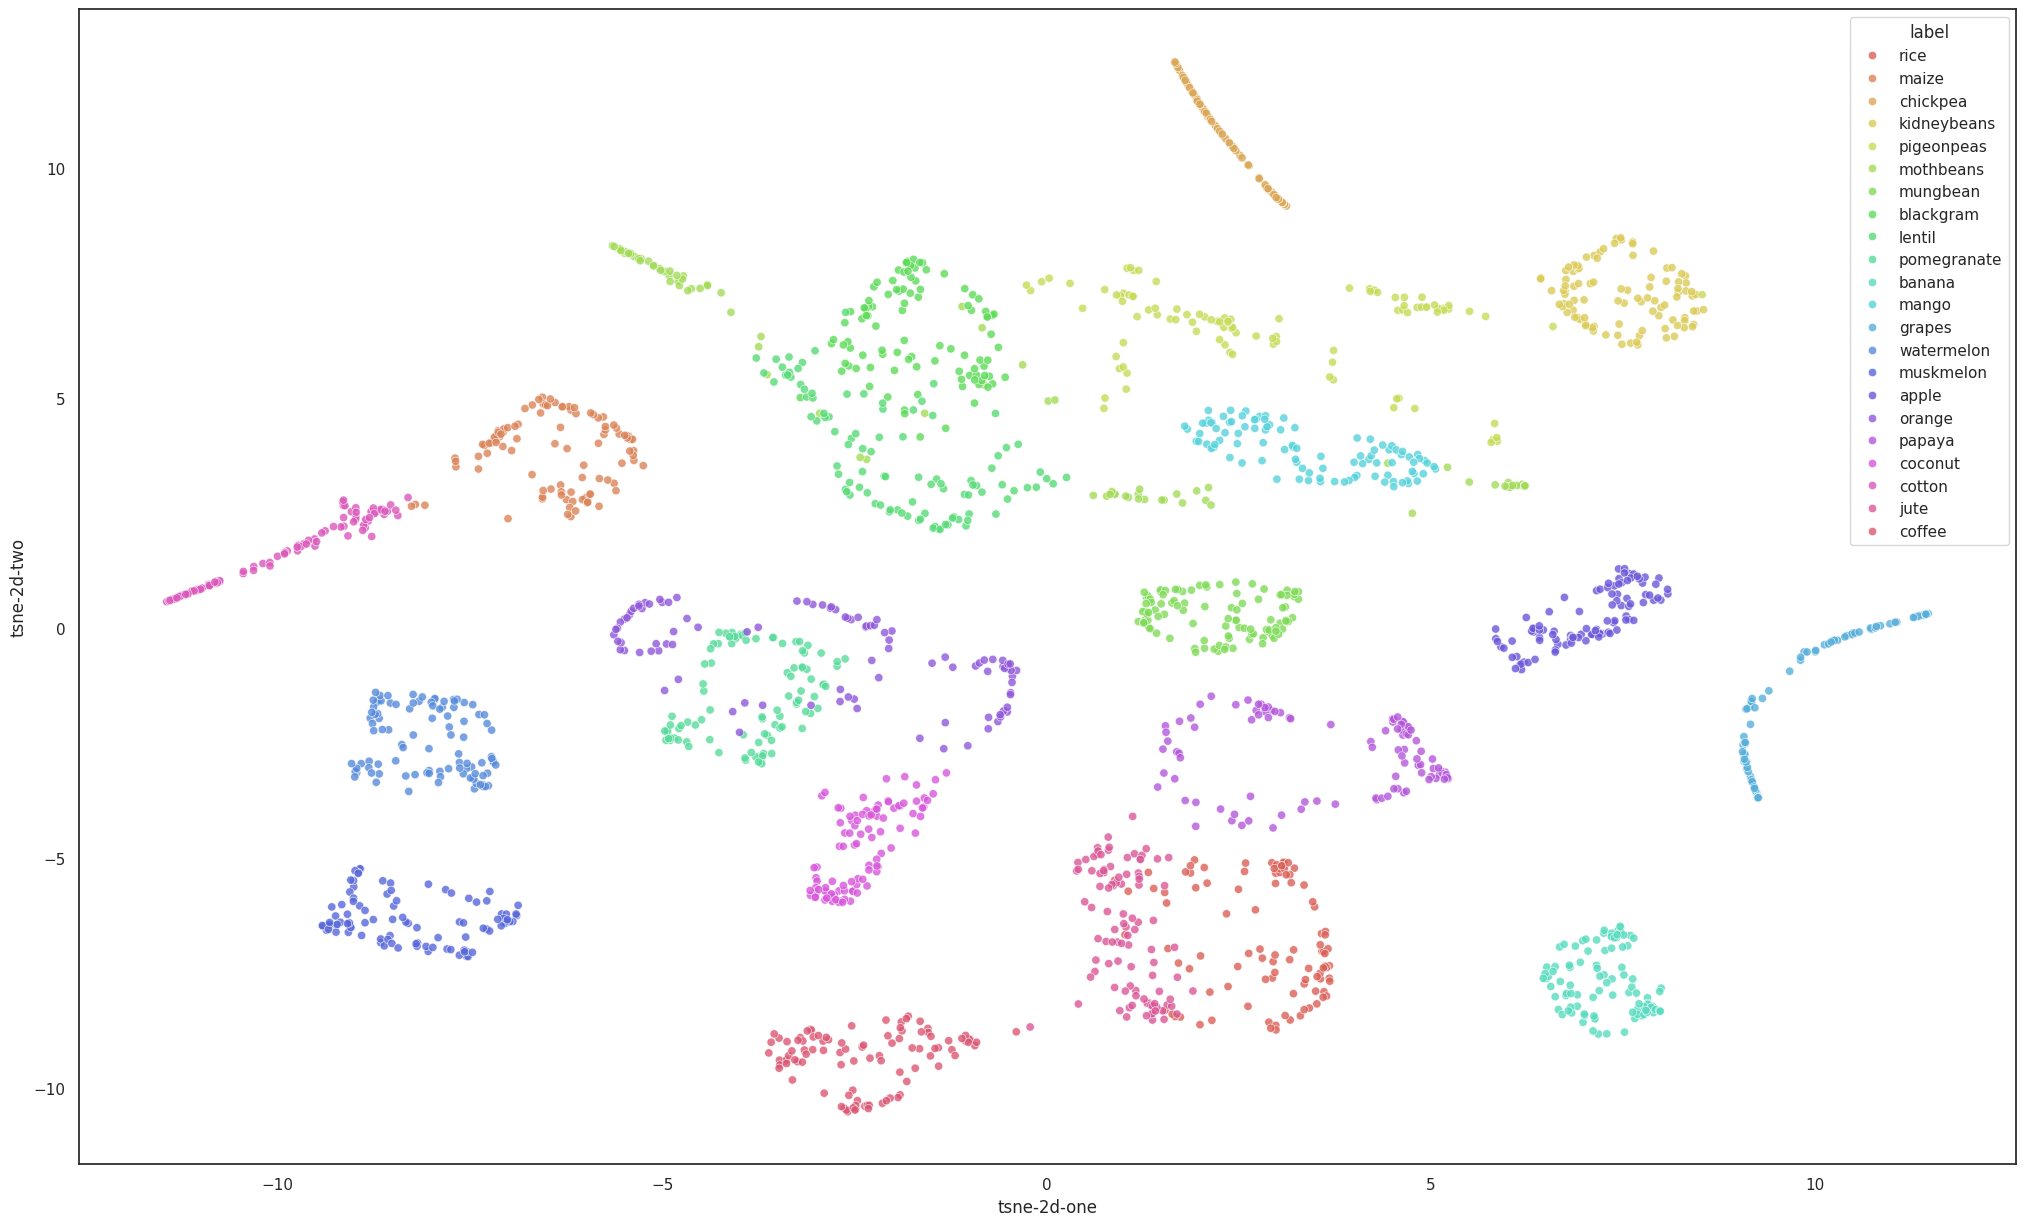

In [36]:
# Crear un DataFrame con la variable objetivo 'y' y las dimensiones reducidas obtenidas de t-SNE
subsetWheatTSNE = pd.DataFrame(y)
subsetWheatTSNE['tsne-2d-one'] = tsneWheatResults[:, 0]
subsetWheatTSNE['tsne-2d-two'] = tsneWheatResults[:, 1]

# Crear un gráfico de dispersión
plt.figure(figsize=(25, 15))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",  # Ejes x e y
    hue="label",  # Color según las etiquetas originales
    palette=sns.color_palette("hls", len(subsetWheatTSNE['label'].unique())),  # Paleta de colores
    data=subsetWheatTSNE,  # Datos
    legend="full",  # Mostrar leyenda completa
    alpha=0.8  # Transparencia de los puntos
)


# K-means

El algoritmo k-means divide los datos en k grupos o clusters, donde cada punto pertenece al cluster cuya distancia es menor.
El agrupamiento se realiza minimizando la suma de distancias cuadradas entre cada objeto y el centroide de su grupo

## Creación del diagrama de codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

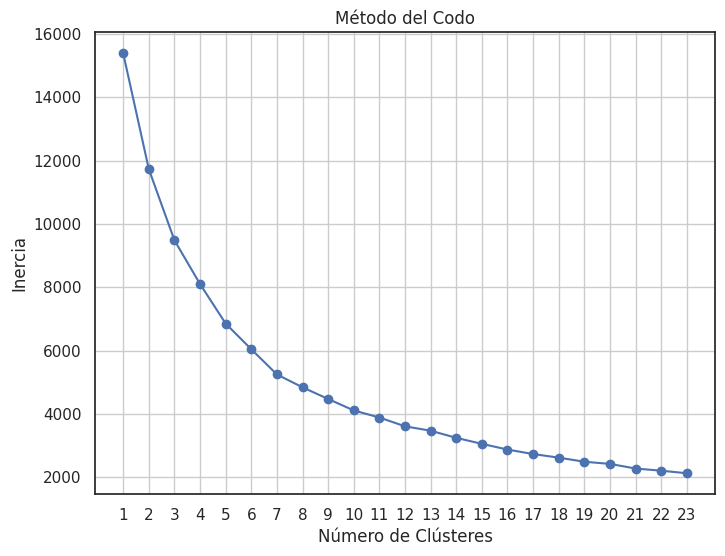

In [37]:
inercia = []
for k in range(1, 24):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 24), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 24))
plt.grid(True)
plt.show()

En base al grafico del codo vamos a quedarnos con el 7° claster

## GAP

In [38]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(x, n_refs=50, cluster_array=np.arange(1, 15))

print("Número óptimo de clusters según el Gap Statistic:", n_clusters)

Número óptimo de clusters según el Gap Statistic: 12


## Creamos el modelo

In [39]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(df_std) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
df['Cluster KMeans'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2


## Gráfico en 3D utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

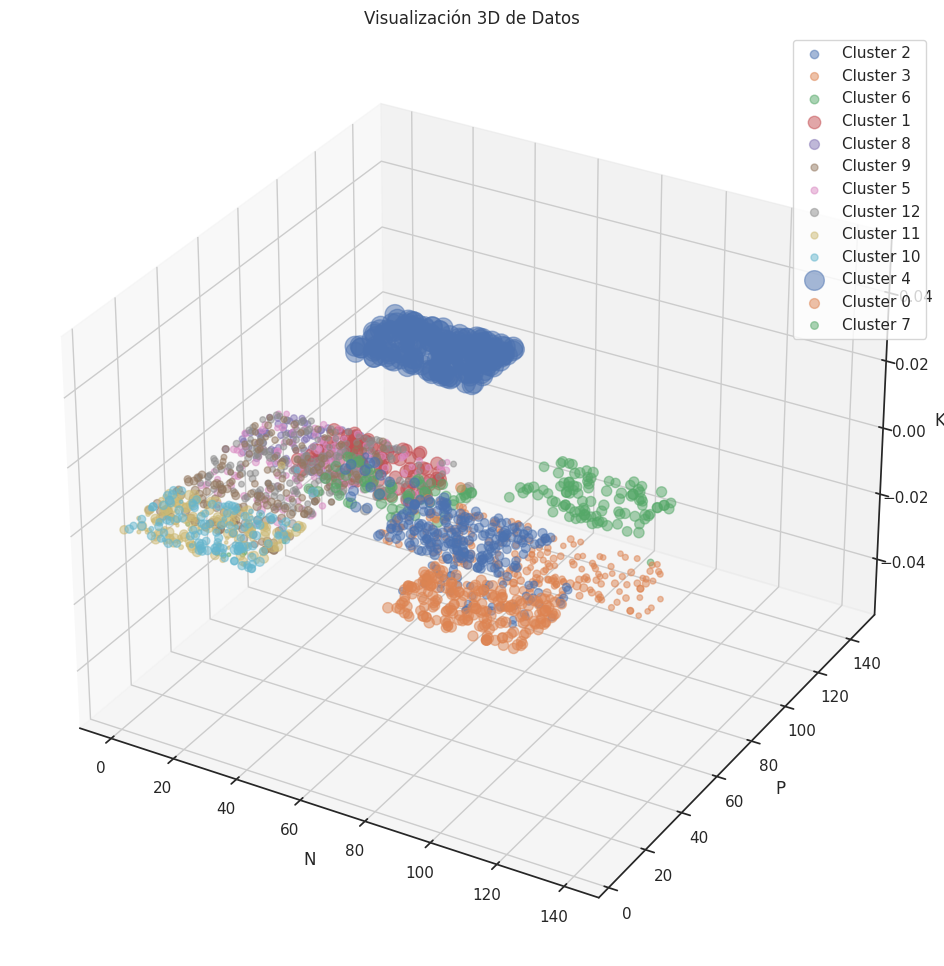

In [40]:
# Crear la figura y el objeto de ejes 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in df['Cluster KMeans'].unique():
    cluster_data = df[df['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['N'], cluster_data['P'], cluster_data['K'], label=f'Cluster {cluster_label}', alpha=0.5)

# Establecer etiquetas de los ejes
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')

# Establecer título y leyenda
plt.title('Visualización 3D de Datos')
plt.legend()

# Mostrar la visualización
plt.show()


# Clutering jerarquico

El clustering Jerárquico el dendrograma representa un clustering jerárquico, donde cada fusión de clusters se muestra como una bifurcación en el gráfico.
las Distancias Euclidianas son las alturas de las bifurcaciones representan las distancias euclidianas entre clusters. Cuanto más alta es la bifurcación, mayor es la distancia.

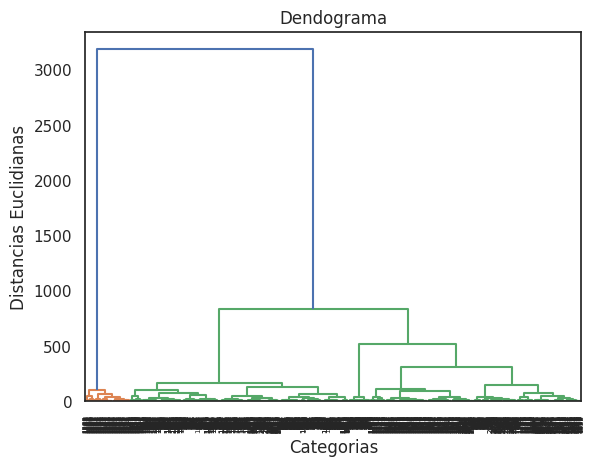

In [41]:
# Clustering Jerárquico
miniCustomers = df.iloc[:, [2, 3]].values
# Creamos el dendograma para encontrar el número óptimo de clusters
dendrogram = sch.dendrogram(sch.linkage(miniCustomers, method ='ward'))
plt.title('Dendograma')
plt.xlabel('Categorias')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [42]:
# Crear una instancia del algoritmo de Clustering Jerárquico Aglomerativo
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Aplicar el algoritmo a los datos y asignar a cada muestra la etiqueta del cluster al que pertenece
y_hc = hc.fit_predict(miniCustomers)


# determinar el número óptimo de clusters en dos algoritmos de clustering diferentes: K-Means y Clustering Jerárquico

In [43]:
# Utilizar el método de gap statistics para determinar el número óptimo de clusters en K-Means
gs_obj = OptimalK(n_jobs=1, n_iter=10)
n_clusters = gs_obj(xScaled, n_refs=50, cluster_array=np.arange(1, 15))
print('Número óptimo de clusters para K-Means: ', n_clusters)

# Utilizar el método de gap statistics para determinar el número óptimo de clusters en Clustering Jerárquico
gs_obj = OptimalK(n_jobs=1, n_iter=20)
n_clusters = gs_obj(miniCustomers.astype('float'), n_refs=60, cluster_array=np.arange(2, 10))
print('Número óptimo de clusters para Clustering Jerárquico: ', n_clusters)

# Calcular el coeficiente de silueta para el Clustering Jerárquico con un número específico de clusters
print(f'Puntuación de silueta (n=4) para Clustering Jerárquico: {silhouette_score(miniCustomers, y_hc)}')


Número óptimo de clusters para K-Means:  14
Número óptimo de clusters para Clustering Jerárquico:  8
Puntuación de silueta (n=4) para Clustering Jerárquico: 0.5969126093688535


In [44]:
# Determinar el número óptimo de clusters para K-Means utilizando el método de Gap Statistics
gs_obj = OptimalK(n_jobs=1, n_iter=10)
n_clusters_kmeans = gs_obj(xScaled, n_refs=50, cluster_array=np.arange(1, 15))
print('Número óptimo de clusters para K-Means: ', n_clusters_kmeans)

# Determinar el número óptimo de clusters para el Clustering Jerárquico utilizando el coeficiente de silueta
silhouette_scores = []
for n_clusters in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    y_hc = hc.fit_predict(miniCustomers)
    silhouette_scores.append(silhouette_score(miniCustomers, y_hc))

optimal_n_clusters_hc = np.argmax(silhouette_scores) + 2  # Sumamos 2 porque empezamos desde 2 clusters
print('Número óptimo de clusters para Clustering Jerárquico: ', optimal_n_clusters_hc)

# Calcular el coeficiente de silueta para el número óptimo de clusters para el Clustering Jerárquico
hc = AgglomerativeClustering(n_clusters=optimal_n_clusters_hc)
y_hc = hc.fit_predict(miniCustomers)
silhouette_score_hc = silhouette_score(miniCustomers, y_hc)
print(f'Coeficiente de silueta para Clustering Jerárquico (n={optimal_n_clusters_hc}): {silhouette_score_hc}')


Número óptimo de clusters para K-Means:  14
Número óptimo de clusters para Clustering Jerárquico:  2
Coeficiente de silueta para Clustering Jerárquico (n=2): 0.8819154285073023
